In [1]:
path = "Forms/death.pdf"

In [2]:
from pdf2image import convert_from_path
import cv2
import numpy as np

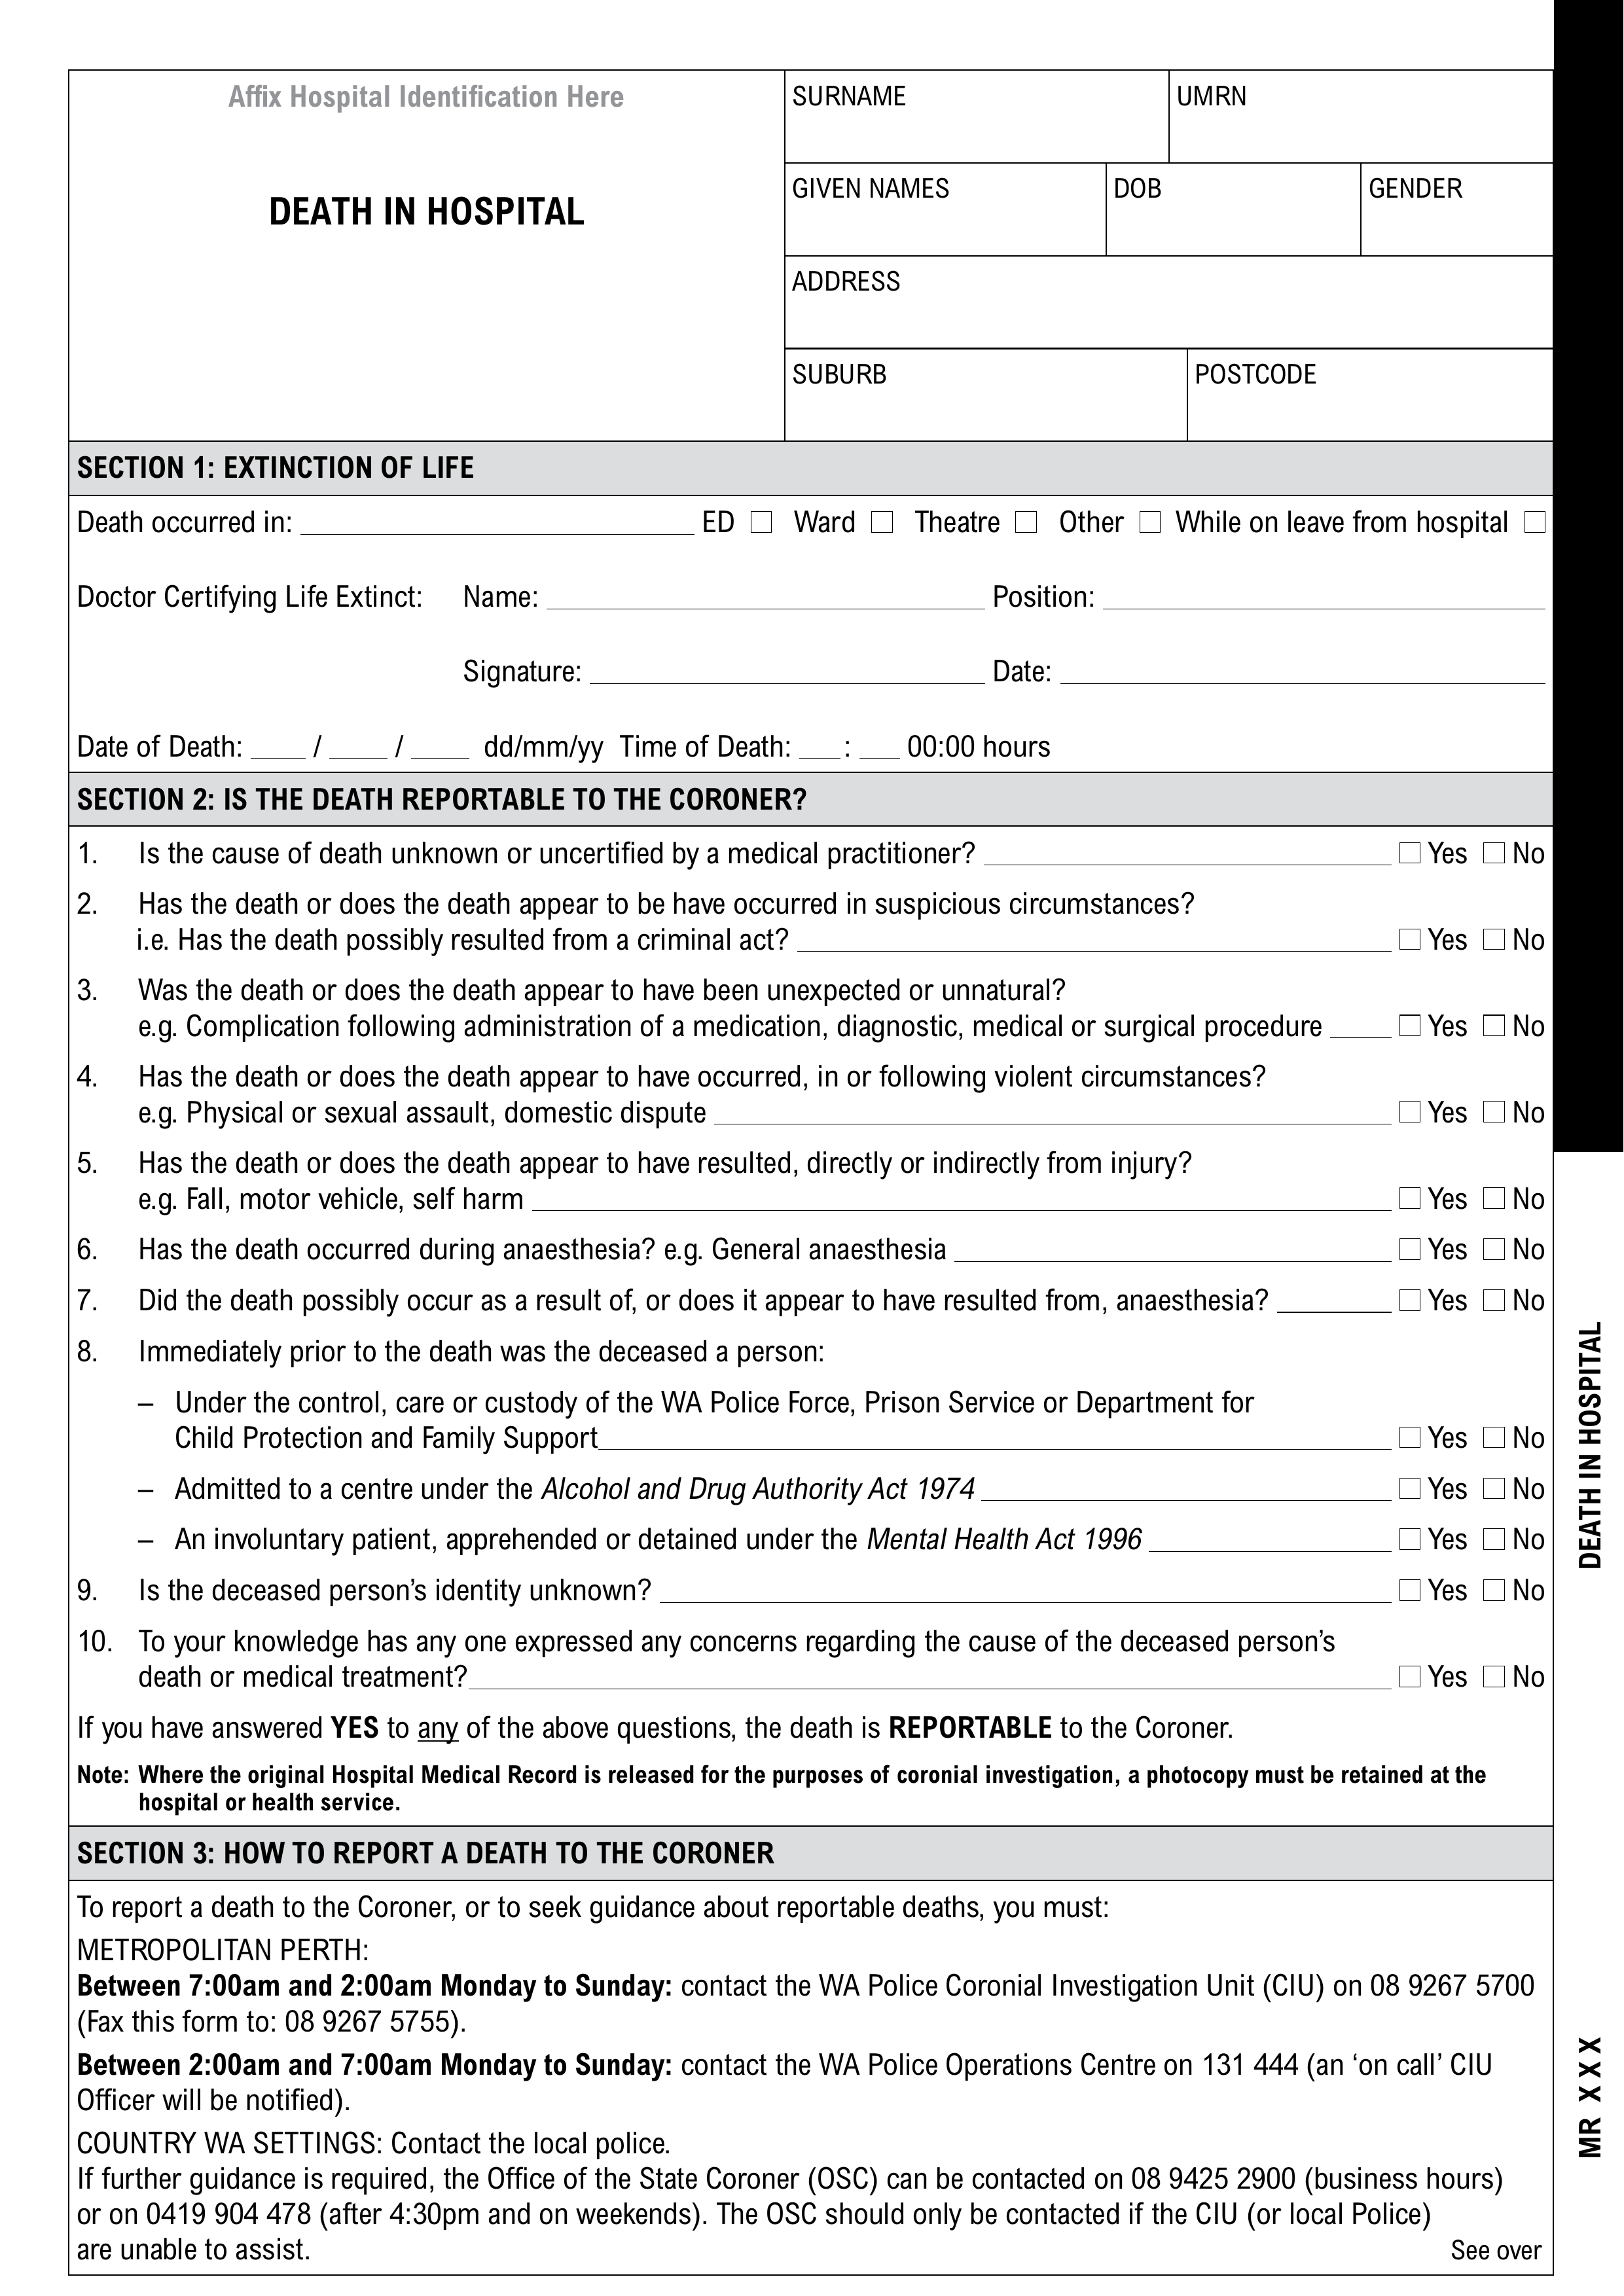

In [3]:
pages = convert_from_path(path, dpi=300)  # remove poppler_path if on macOS/Linux
page = pages[0]
page

In [4]:
open_cv_image = cv2.cvtColor(np.array(page), cv2.COLOR_RGB2BGR)
open_cv_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [5]:
%matplotlib widget

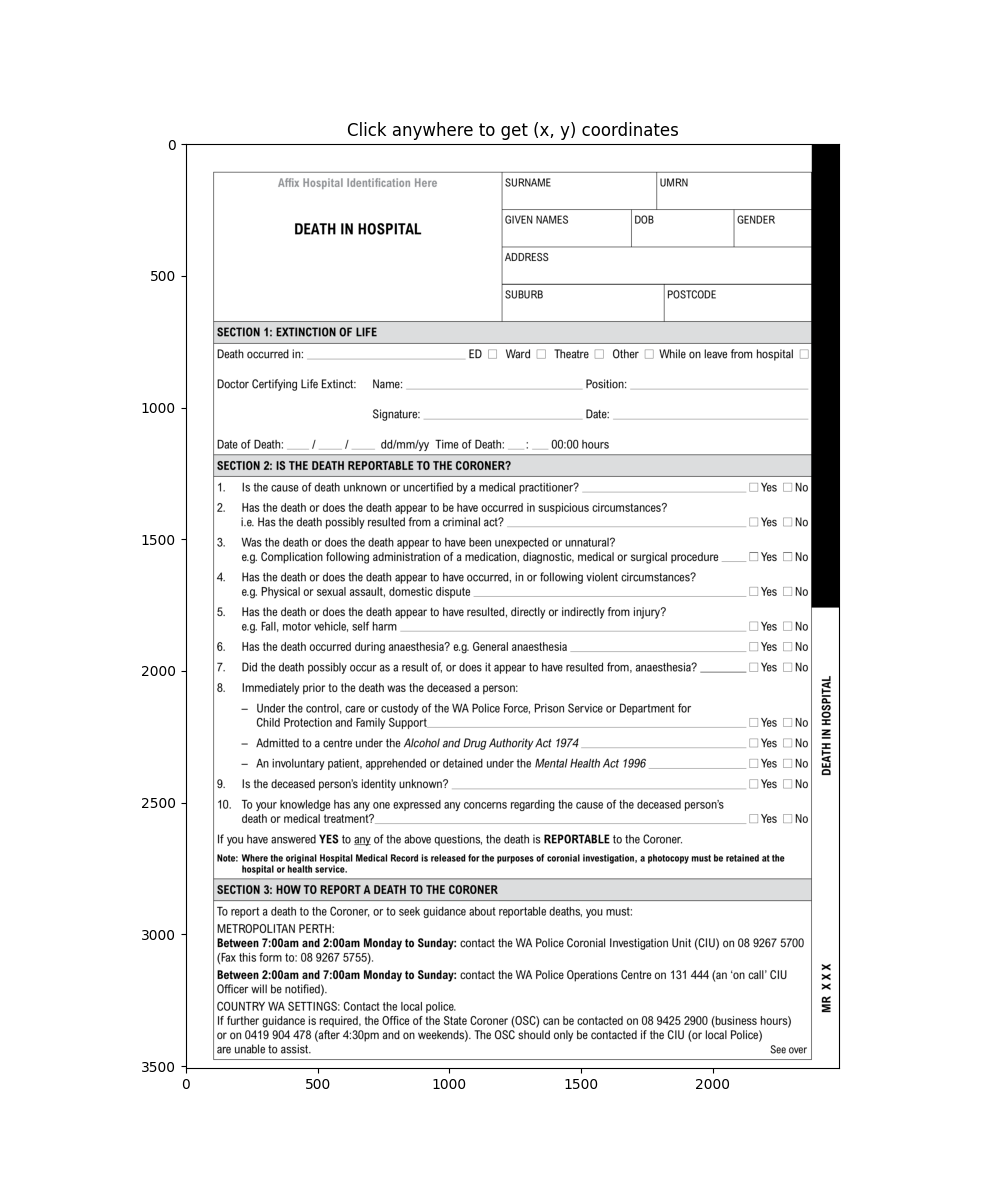

Clicked at: x=1165, y=796
Clicked at: x=1351, y=808
Clicked at: x=1560, y=796
Clicked at: x=1762, y=792
Clicked at: x=2335, y=800


In [10]:
import cv2
import numpy as np
from pdf2image import convert_from_path
import matplotlib.pyplot as plt

# --- Load first page of your PDF ---
pdf_path = "Forms/death.pdf"
page = convert_from_path(pdf_path, dpi=300)[0]  # first page

# Convert to OpenCV (BGR)
open_cv_image = cv2.cvtColor(np.array(page), cv2.COLOR_RGB2BGR)

# --- Display image and capture clicks ---
fig, ax = plt.subplots(figsize=(10, 12))
ax.imshow(cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB), origin='upper')
ax.set_title("Click anywhere to get (x, y) coordinates")

coords = []

def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        x, y = int(event.xdata), int(event.ydata)
        coords.append((x, y))
        print(f"Clicked at: x={x}, y={y}")
        ax.plot(x, y, 'ro')  # mark click
        fig.canvas.draw()

fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()